In [94]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from   matplotlib.colors import LogNorm

import compute_charge_dist as fz

from scipy.optimize import curve_fit

import time

%matplotlib inline


grain_type = "silicate"
#grain_type = "carbonaceous"
pcent      = 1

include_500_1000 = True


#save_dir = "/home/jcibanezm/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"
save_dir = "/Users/juan/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"


########################################################################################

grain_size = 3

filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist_3AA = pickle.load(pkl_file)
pkl_file.close

########################################################################################

grain_size = 5

filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist_5AA = pickle.load(pkl_file)
pkl_file.close

########################################################################################

grain_size = 10

filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist_10AA = pickle.load(pkl_file)
pkl_file.close

########################################################################################

grain_size = 50

filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist_50AA = pickle.load(pkl_file)
pkl_file.close

########################################################################################

grain_size = 100

filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist_100AA = pickle.load(pkl_file)
pkl_file.close

########################################################################################

if include_500_1000 == True:
    print("Loading the charge distribution for 500 and 1000 Angstrom grains")
    grain_size = 500
    pcent      = 0.1

    filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

    pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
    cdist_500AA = pickle.load(pkl_file)
    pkl_file.close

    ########################################################################################

    grain_size = 1000

    filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

    pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
    cdist_1000AA = pickle.load(pkl_file)
    pkl_file.close


Loading the charge distribution for 500 and 1000 Angstrom grains


In [95]:
echargeSI = 1.60217663e-19 # Coulomb
AAtom     = 1.0e-10

In [96]:
too_high = np.where(cdist_3AA["nH"] > 2.0e4)
if include_500_1000 == True:
    too_high_500 = np.where(cdist_500AA["nH"] > 2.0e4)
    too_high_1000 = np.where(cdist_1000AA["nH"] > 2.0e4)
    
ii = 0
for key in cdist_3AA.keys():
    #arrs.append(0)
    if key!="Qabs_mean" and key!="grain_size" and key!="grain_type" and key!="MPI" and key!="fdist" and key!="info" and key!="zminmax" and key!="ZZ":
        #print(key)
        cdist_3AA[key]    = np.delete(cdist_3AA[key],    too_high)
        cdist_5AA[key]    = np.delete(cdist_5AA[key],    too_high)
        cdist_10AA[key]   = np.delete(cdist_10AA[key],   too_high)
        cdist_50AA[key]   = np.delete(cdist_50AA[key],   too_high)
        cdist_100AA[key]  = np.delete(cdist_100AA[key],  too_high)
        if include_500_1000 == True:
            cdist_500AA[key]  = np.delete(cdist_500AA[key],  too_high_500)
            cdist_1000AA[key] = np.delete(cdist_1000AA[key], too_high_1000)
    #ii +=1

In [97]:
GTn_3AA    = (cdist_3AA["G"]  +cdist_3AA["G_CR"])  * np.sqrt(cdist_3AA["temp"])   / cdist_3AA["new_ne"] 
GTn_5AA    = (cdist_5AA["G"]  +cdist_5AA["G_CR"])  * np.sqrt(cdist_5AA["temp"])   / cdist_5AA["new_ne"] 
GTn_10AA   = (cdist_10AA["G"] +cdist_10AA["G_CR"]) * np.sqrt(cdist_10AA["temp"])  / cdist_10AA["new_ne"] 
GTn_50AA   = (cdist_50AA["G"] +cdist_50AA["G_CR"]) * np.sqrt(cdist_50AA["temp"])  / cdist_50AA["new_ne"] 
GTn_100AA  = (cdist_100AA["G"]+cdist_100AA["G_CR"])* np.sqrt(cdist_100AA["temp"]) / cdist_100AA["new_ne"] 

if include_500_1000 == True:
    GTn_500AA  = (cdist_500AA["G"] +cdist_500AA["G_CR"])  * np.sqrt(cdist_500AA["temp"])  / cdist_500AA["new_ne"] 
    GTn_1000AA = (cdist_1000AA["G"]+cdist_1000AA["G_CR"]) * np.sqrt(cdist_1000AA["temp"]) / cdist_1000AA["new_ne"] 

In [98]:
# New function like a press schechter like, combining a power law and an exponential growth.

# New function including powers between -3, 3
# def function(x,alpha1, beta1, gamma1, alpha2, beta2, gamma2):
def function(x, alpha, aa, bb, hh):

    Zcent = aa * (x[:])**alpha * (1.0 - np.exp(-x[:]/hh)) + bb
    
    return Zcent

In [99]:
Zparam_3AA   = function(GTn_3AA, 0.32629,   0.01488,  -0.12116, 57.1965)
Zparam_5AA   = function(GTn_5AA, 0.314166,  0.03716,  -0.304356,   85.5765)
Zparam_10AA  = function(GTn_10AA, 0.35352,  0.049429, -0.486479,  72.77927)
Zparam_50AA  = function(GTn_50AA, 0.5115 , 0.0717 , -0.4106 , 107.5)
Zparam_100AA = function(GTn_100AA, 0.3525 , 0.6591 ,-0.1649 , 383.8)
Zparam_500AA  = function(GTn_500AA, 0.3643 , 2.6284 , 0.5217 , 344.8)
Zparam_1000AA = function(GTn_1000AA, 0.3927 , 3.6493 , 0.8389 , 372.45)

##### 

In [100]:
Uavg3 = (cdist_3AA["zmean"]*echargeSI/(3.5*AAtom)*8.99e9)
Uavg5 = (cdist_5AA["zmean"]*echargeSI/(5.0*AAtom)*8.99e9)
Uavg10 = (cdist_10AA["zmean"]*echargeSI/(10.0*AAtom)*8.99e9)
Uavg50 = (cdist_50AA["zmean"]*echargeSI/(50.0*AAtom)*8.99e9)
Uavg100 = (cdist_100AA["zmean"]*echargeSI/(100.0*AAtom)*8.99e9)
Uavg500 = (cdist_500AA["zmean"]*echargeSI/(500.0*AAtom)*8.99e9)
Uavg1000 = (cdist_1000AA["zmean"]*echargeSI/(1000.0*AAtom)*8.99e9)

In [101]:
print(np.min(Uavg3), np.max(Uavg3))
print(np.min(Uavg5), np.max(Uavg5))
print(np.min(Uavg10), np.max(Uavg10))
print(np.min(Uavg50), np.max(Uavg50))
print(np.min(Uavg100), np.max(Uavg100))
print(np.min(Uavg500), np.max(Uavg500))
print(np.min(Uavg1000), np.max(Uavg1000))

(-0.73272641978522446, 1.5086302185893652)
(-1.174427577503816, 1.7180344733003607)
(-0.86294920946086884, 1.8080728632655609)
(-0.21319260436189258, 2.8566483116548502)
(-0.10564530006939174, 3.1559809568502213)
(-0.018870765951512148, 2.7605010826725871)
(-0.0094291142951032306, 2.5523101060993998)


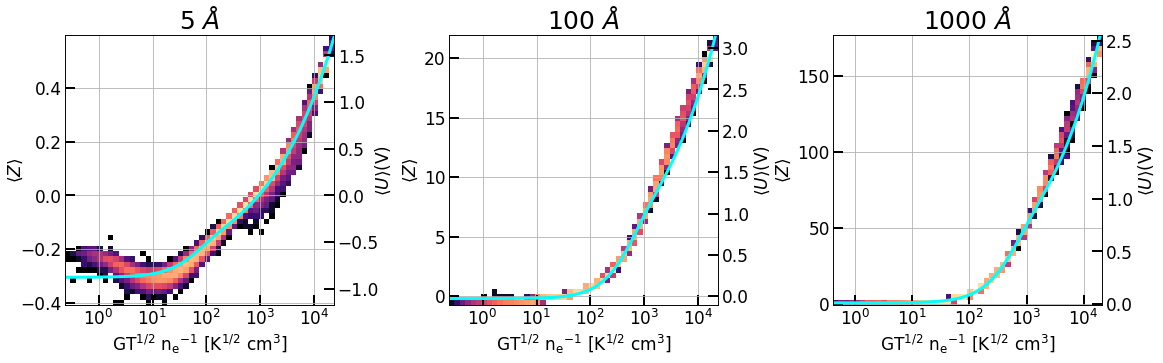

In [102]:
xsize = 16
ysize = 5

nfigs_x = 3
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.07
wpad = 0.1
w0 = 0.05

xs_panel = 0.70 / nfigs_x 
ys_panel = 0.75 / nfigs_y 

# Formatting tick labels in log scale.
def format_func(value, tick_number):
    return "10$^{%i}$"%value

labelsize = 17
labelfont = 17
############################################################################################################
############################               5 Angstroms             #######################################
############################################################################################################


ii = 0
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, 2.3*hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(GTn_5AA), cdist_5AA["zmean"], bins=50, norm=LogNorm(), normed=True, cmap="magma")

GTn_arr = np.logspace(np.log10(np.min(GTn_5AA)), np.log10(np.max(GTn_5AA)))
NewPar  = function(GTn_arr, 0.3342 , 0.0309 , -0.3041 , 47)

#ax.plot((GTn_arr), NewPar, "-r", linewidth=3)
ax.plot(np.log10(GTn_arr), NewPar, "-", color="cyan", linewidth=3)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_xlabel("GT$^{1/2}$ n$_{\\mathrm{e}}$$^{-1}$ [K$^{1/2}$ cm$^{3}$]", fontsize=labelfont)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=labelfont, labelpad=-5)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax.grid("on")

ax1 = ax.twinx()
ax1.set_ylabel("$\\langle U \\rangle$(V)", fontsize=labelfont, labelpad=-5)
ax1.set_ylim(np.min(Uavg5), np.max(Uavg5))

ax1.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax1.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

ax.set_title("5 $\\AA$", fontsize=25)


############################################################################################################
############################               100 Angstroms             #######################################

ii = 1
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, 2.3*hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(GTn_100AA), cdist_100AA["zmean"], bins=50, norm=LogNorm(), normed=True, cmap="magma")

GTn_arr = np.logspace(np.log10(np.min(GTn_100AA)), np.log10(np.max(GTn_100AA)))
NewPar  = function(GTn_arr, 0.3525 , 0.6591 ,-0.1849 , 383.8)

ax.plot(np.log10(GTn_arr), NewPar, "-", color="cyan", linewidth=3)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_xlabel("GT$^{1/2}$ n$_{\\mathrm{e}}$$^{-1}$ [K$^{1/2}$ cm$^{3}$]", fontsize=labelfont)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=labelfont)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax.grid("on")

ax1 = ax.twinx()
ax1.set_ylabel("$\\langle U \\rangle$(V)", fontsize=labelfont)
ax1.set_ylim(np.min(Uavg100), np.max(Uavg100))

ax1.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax1.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

ax.set_title("100 $\\AA$", fontsize=25)

############################################################################################################
############################            1000 Angstroms             #######################################


ii = 2
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, 2.3*hpad + jj*ys_panel, xs_panel, ys_panel])

#ax.hist2d(GTn_1000AA, cdist_1000AA["zmean"], bins=50, norm=LogNorm(), normed=True, cmap="magma")
ax.hist2d(np.log10(GTn_1000AA), cdist_1000AA["zmean"], bins=50, norm=LogNorm(), normed=True, cmap="magma")

#GTn_arr = np.linspace(np.min(GTn_1000AA), np.max(GTn_1000AA))
GTn_arr = np.logspace(np.log10(np.min(GTn_1000AA)), np.log10(np.max(GTn_1000AA)))
#NewPar  = function(GTn_arr, 0.3635 , 4.6588 , 1.6579 , 486.)
NewPar  = function(GTn_arr, 0.3927 , 3.6493 , 0.8389 , 372.45)

#ax.plot((GTn_arr), NewPar, "-r", linewidth=3)
ax.plot(np.log10(GTn_arr), NewPar, "-", color="cyan", linewidth=3)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_xlabel("GT$^{1/2}$ n$_{\\mathrm{e}}$$^{-1}$ [K$^{1/2}$ cm$^{3}$]", fontsize=labelfont)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=labelfont)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax.grid("on")

ax1 = ax.twinx()
ax1.set_ylabel("$\\langle U \\rangle$(V)", fontsize=labelfont)
ax1.set_ylim(np.min(Uavg1000), np.max(Uavg1000))

ax1.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax1.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

ax.set_title("1000 $\\AA$", fontsize=25)

fig.show()

#fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Figure7_%s_centroid.pdf"%(grain_type), format="pdf")
fig.savefig("/Users/juan/Dropbox/Projects/Papers/Submitted/GrainCharge/Figures/Figure7_%s_centroid.pdf"%(grain_type), format="pdf")

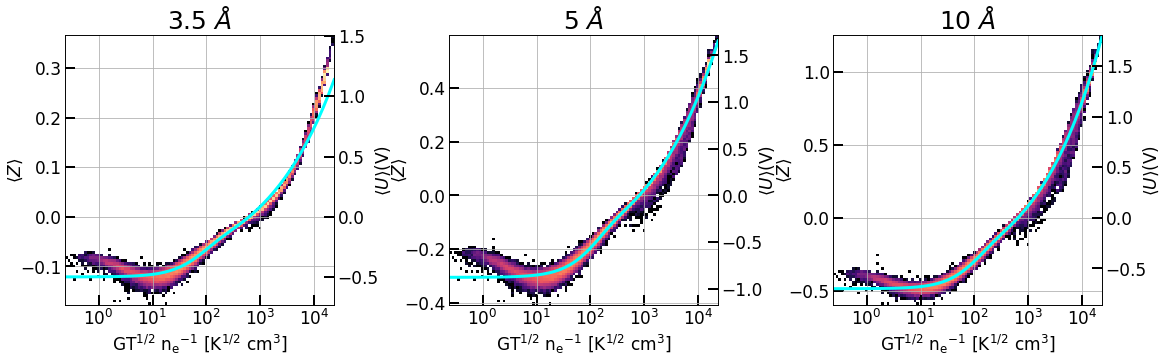

In [103]:
xsize = 16
ysize = 5

nfigs_x = 3
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.07
wpad = 0.1
w0 = 0.05

xs_panel = 0.70 / nfigs_x 
ys_panel = 0.75 / nfigs_y 

# Formatting tick labels in log scale.
def format_func(value, tick_number):
    return "10$^{%i}$"%value

labelsize = 17
labelfont = 17
############################################################################################################
############################               5 Angstroms             #######################################
############################################################################################################


ii = 0
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, 2.3*hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(GTn_3AA), cdist_3AA["zmean"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

GTn_arr = np.logspace(np.log10(np.min(GTn_3AA)), np.log10(np.max(GTn_3AA)))
NewPar  = function(GTn_arr, 0.32629,   0.01488,  -0.12116, 57.1965)


#ax.plot((GTn_arr), NewPar, "-r", linewidth=3)
ax.plot(np.log10(GTn_arr), NewPar, "-", color="cyan", linewidth=3)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_xlabel("GT$^{1/2}$ n$_{\\mathrm{e}}$$^{-1}$ [K$^{1/2}$ cm$^{3}$]", fontsize=labelfont)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=labelfont, labelpad=-5)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax.grid("on")

ax1 = ax.twinx()
ax1.set_ylabel("$\\langle U \\rangle$(V)", fontsize=labelfont, labelpad=-5)
ax1.set_ylim(np.min(Uavg3), np.max(Uavg3))

ax1.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax1.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

ax.set_title("3.5 $\\AA$", fontsize=25)


############################################################################################################
############################               5 Angstroms             #######################################

ii = 1
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, 2.3*hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(GTn_5AA), cdist_5AA["zmean"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

GTn_arr = np.logspace(np.log10(np.min(GTn_5AA)), np.log10(np.max(GTn_5AA)))
NewPar  = function(GTn_arr, 0.314166,  0.03716,  -0.304356,   85.5765)


ax.plot(np.log10(GTn_arr), NewPar, "-", color="cyan", linewidth=3)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_xlabel("GT$^{1/2}$ n$_{\\mathrm{e}}$$^{-1}$ [K$^{1/2}$ cm$^{3}$]", fontsize=labelfont)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=labelfont, labelpad=-5)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax.grid("on")

ax1 = ax.twinx()
ax1.set_ylabel("$\\langle U \\rangle$(V)", fontsize=labelfont, labelpad=-5)
ax1.set_ylim(np.min(Uavg5), np.max(Uavg5))

ax1.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax1.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

ax.set_title("5 $\\AA$", fontsize=25)

############################################################################################################
############################            10 Angstroms             #######################################


ii = 2
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, 2.3*hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(GTn_10AA), cdist_10AA["zmean"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

GTn_arr = np.logspace(np.log10(np.min(GTn_10AA)), np.log10(np.max(GTn_10AA)))
NewPar  = function(GTn_arr, 0.35352,  0.049429, -0.486479,  72.77927)

ax.plot(np.log10(GTn_arr), NewPar, "-", color="cyan", linewidth=3)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_xlabel("GT$^{1/2}$ n$_{\\mathrm{e}}$$^{-1}$ [K$^{1/2}$ cm$^{3}$]", fontsize=labelfont)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=labelfont, labelpad=-5)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax.grid("on")

ax1 = ax.twinx()
ax1.set_ylabel("$\\langle U \\rangle$(V)", fontsize=labelfont, labelpad=-5)
ax1.set_ylim(np.min(Uavg10), np.max(Uavg10))

ax1.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax1.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")
ax.set_title("10 $\\AA$", fontsize=25)

fig.show()

#fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Apendix/Figure7_%s-3-5-10AA_centroid.pdf"%(grain_type), format="pdf")
fig.savefig("/Users/juan/Dropbox/Projects/Papers/Submitted/GrainCharge/Figures/Apendix/Figure7_%s-3-5-10AA_centroid.pdf"%(grain_type), format="pdf")

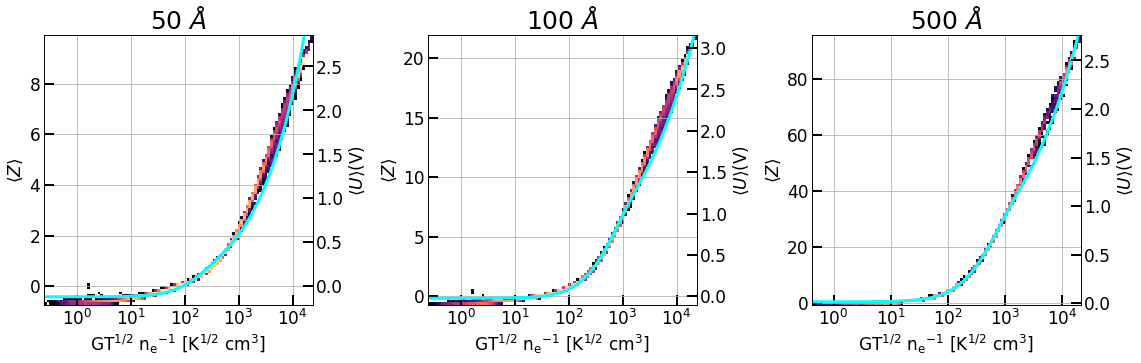

In [104]:
xsize = 16
ysize = 5

nfigs_x = 3
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.07
wpad = 0.1
w0 = 0.05

xs_panel = 0.70 / nfigs_x 
ys_panel = 0.75 / nfigs_y 

# Formatting tick labels in log scale.
def format_func(value, tick_number):
    return "10$^{%i}$"%value

labelsize = 17
labelfont = 17
############################################################################################################
############################               50 Angstroms             #######################################
############################################################################################################


ii = 0
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, 2.3*hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(GTn_50AA), cdist_50AA["zmean"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

GTn_arr = np.logspace(np.log10(np.min(GTn_50AA)), np.log10(np.max(GTn_50AA)))
NewPar  = function(GTn_arr, 0.5115 , 0.0717 , -0.4106 , 107.5)

#ax.plot((GTn_arr), NewPar, "-r", linewidth=3)
ax.plot(np.log10(GTn_arr), NewPar, "-", color="cyan", linewidth=3)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_xlabel("GT$^{1/2}$ n$_{\\mathrm{e}}$$^{-1}$ [K$^{1/2}$ cm$^{3}$]", fontsize=labelfont)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=labelfont)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax.grid("on")

ax1 = ax.twinx()
ax1.set_ylabel("$\\langle U \\rangle$(V)", fontsize=labelfont)
ax1.set_ylim(np.min(Uavg50), np.max(Uavg50))

ax1.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax1.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

ax.set_title("50 $\\AA$", fontsize=25)


############################################################################################################
############################               100 Angstroms             #######################################

ii = 1
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, 2.3*hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(GTn_100AA), cdist_100AA["zmean"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

GTn_arr = np.logspace(np.log10(np.min(GTn_100AA)), np.log10(np.max(GTn_100AA)))
NewPar  = function(GTn_arr, 0.3525 , 0.6591 ,-0.1649 , 383.8)

ax.plot(np.log10(GTn_arr), NewPar, "-", color="cyan", linewidth=3)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_xlabel("GT$^{1/2}$ n$_{\\mathrm{e}}$$^{-1}$ [K$^{1/2}$ cm$^{3}$]", fontsize=labelfont)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=labelfont)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax.grid("on")

ax1 = ax.twinx()
ax1.set_ylabel("$\\langle U \\rangle$(V)", fontsize=labelfont)
ax1.set_ylim(np.min(Uavg100), np.max(Uavg100))

ax1.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax1.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")
ax.set_title("100 $\\AA$", fontsize=25)

############################################################################################################
############################            1000 Angstroms             #######################################


ii = 2
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, 2.3*hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(GTn_500AA), cdist_500AA["zmean"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

GTn_arr = np.logspace(np.log10(np.min(GTn_500AA)), np.log10(np.max(GTn_500AA)))
NewPar  = function(GTn_arr, 0.3643 , 2.6284 , 0.5217 , 344.8)


ax.plot(np.log10(GTn_arr), NewPar, "-", color="cyan", linewidth=3)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_xlabel("GT$^{1/2}$ n$_{\\mathrm{e}}$$^{-1}$ [K$^{1/2}$ cm$^{3}$]", fontsize=labelfont)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=labelfont)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax.grid("on")

ax1 = ax.twinx()
ax1.set_ylabel("$\\langle U \\rangle$(V)", fontsize=labelfont)
ax1.set_ylim(np.min(Uavg500), np.max(Uavg500))

ax1.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax1.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")
ax.set_title("500 $\\AA$", fontsize=25)

fig.show()

#fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Apendix/Figure7_%s-50-100-500AA_centroid.pdf"%(grain_type), format="pdf")
fig.savefig("/Users/juan/Dropbox/Projects/Papers/Submitted/GrainCharge/Figures/Apendix/Figure7_%s-50-100-500AA_centroid.pdf"%(grain_type), format="pdf")

### Now for the width.

In [105]:
# New function including powers between -3, 3
# def function(x,alpha1, beta1, gamma1, alpha2, beta2, gamma2):
def function_sigma_pos(x, aa, hh, bb):

    #sigma_par = aa*(1. - np.exp(-np.abs(x[:])/hh)) + bb
    sigma_par = aa*(1. - np.exp(-x[:]/hh)) + bb
    
    return sigma_par

# New function including powers between -3, 3
# def function(x,alpha1, beta1, gamma1, alpha2, beta2, gamma2):
def function_sigma_neg(x, aa, bb, hh):
    sigma_par = aa*(1. - np.exp(x[:]/hh)) + bb    
    return sigma_par

#def function_sigma_neg(x, aa, bb):
#    sigma_par = aa*np.abs(x[:]) + bb
#    return sigma_par

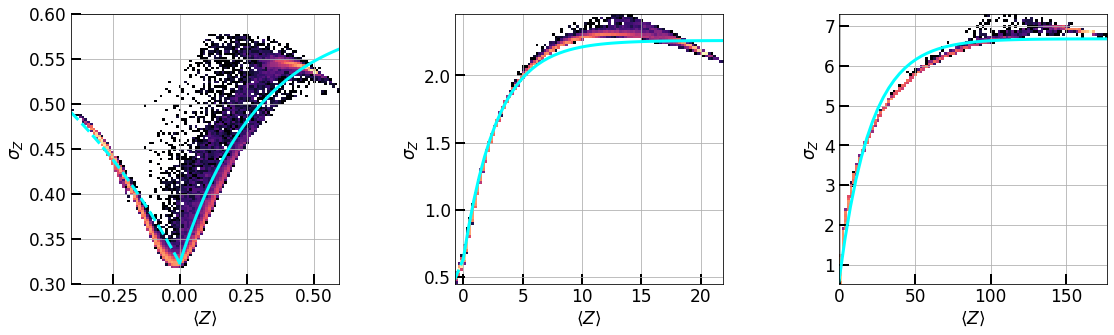

In [106]:
xsize = 16
ysize = 5

nfigs_x = 3
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

#hpad = 0.17
#wpad = 0.06
#xs_panel = 0.81 / nfigs_x 
#ys_panel = 0.78 / nfigs_y 

hpad = 0.17
wpad = 0.1
w0 = 0.06
xs_panel = 0.70 / nfigs_x 
ys_panel = 0.75 / nfigs_y 

# Formatting tick labels in log scale.
def format_func(value, tick_number):
    return "10$^{%i}$"%value

labelsize = 17
labelfont = 17

############################################################################################################
############################               5 Angstroms             #######################################
############################################################################################################

ii = 0
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, hpad + jj*ys_panel, xs_panel, ys_panel])


ax.hist2d(cdist_5AA["zmean"], cdist_5AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

zmean_arr_pos = np.linspace(0, np.max(cdist_5AA["zmean"]))
NewPar        = function_sigma_pos(zmean_arr_pos, 0.2734, 0.2925, 0.3233)
ax.plot(zmean_arr_pos, NewPar, "-", color="cyan", linewidth=3)

zmean_arr_neg = np.linspace(np.min(cdist_5AA["zmean"]), 0)
NewPar_neg        = function_sigma_neg(zmean_arr_neg, 0.3615, 0.3233, 0.6532)
ax.plot(zmean_arr_neg, NewPar_neg, "--", color="cyan", linewidth=3)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\sigma_{Z}$", fontsize=labelfont)
ax.set_xlabel("$\\langle Z \\rangle$", fontsize=labelfont)

ax.set_ylim(0.3, 0.60)

ax.grid("on")


############################################################################################################
############################               100 Angstroms             #######################################


ii = 1
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(cdist_100AA["zmean"], cdist_100AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

zmean_arr_pos = np.linspace(0, np.max(cdist_100AA["zmean"]))
NewPar        = function_sigma_pos(zmean_arr_pos, 1.6245, 2.8390, 0.6346)
ax.plot(zmean_arr_pos, NewPar, "-", color="cyan", linewidth=3)

zmean_arr_neg = np.linspace(np.min(cdist_100AA["zmean"]), 0)
NewPar_neg        = function_sigma_neg(zmean_arr_neg, -4.2075e2, 0.6346, 1.984e3)
ax.plot(zmean_arr_neg, NewPar_neg, "--", color="cyan", linewidth=3)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\sigma_{Z}$", fontsize=labelsize)
ax.set_xlabel("$\\langle Z \\rangle$", fontsize=labelsize)

ax.grid("on")




############################################################################################################
############################            1000 Angstroms             #######################################


ii = 2
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(cdist_1000AA["zmean"], cdist_1000AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

zmean_arr_pos = np.linspace(0, np.max(cdist_1000AA["zmean"]))
NewPar        = function_sigma_pos(zmean_arr_pos, 5.9813, 20.6410, 0.6961)
ax.plot(zmean_arr_pos, NewPar, "-", color="cyan", linewidth=3)

zmean_arr_neg = np.linspace(np.min(cdist_1000AA["zmean"]), 0)
NewPar_neg        = function_sigma_neg(zmean_arr_neg, -0.1885, 0.6961, 0.4237)
ax.plot(zmean_arr_neg, NewPar_neg, "--", color="cyan", linewidth=3)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\sigma_{Z}$", fontsize=labelsize)
ax.set_xlabel("$\\langle Z \\rangle$", fontsize=labelsize)

ax.grid("on")

fig.show()

#fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Figure7_%s_width.pdf"%(grain_type), format="pdf")
fig.savefig("/Users/juan/Dropbox/Projects/Papers/Submitted/GrainCharge/Figures/Figure7_%s_width.pdf"%(grain_type), format="pdf")

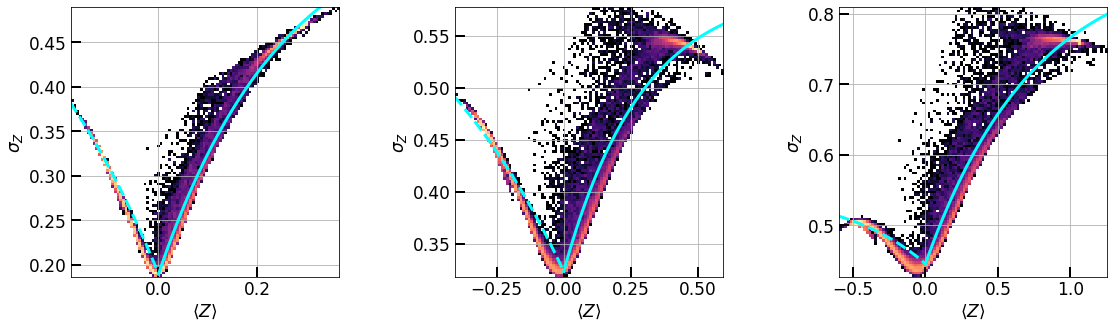

In [107]:
xsize = 16
ysize = 5

nfigs_x = 3
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.17
wpad = 0.1
w0 = 0.06
xs_panel = 0.70 / nfigs_x 
ys_panel = 0.75 / nfigs_y 

# Formatting tick labels in log scale.
def format_func(value, tick_number):
    return "10$^{%i}$"%value

labelsize = 17
labelfont = 17

############################################################################################################
############################               5 Angstroms             #######################################
############################################################################################################

ii = 0
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, hpad + jj*ys_panel, xs_panel, ys_panel])


ax.hist2d(cdist_3AA["zmean"], cdist_3AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

zmean_arr_pos = np.linspace(0, np.max(cdist_3AA["zmean"]))
NewPar        = function_sigma_pos(zmean_arr_pos, 0.4123, 0.2513, 0.1891)
ax.plot(zmean_arr_pos, NewPar, "-", color="cyan", linewidth=3)

zmean_arr_neg = np.linspace(np.min(cdist_3AA["zmean"]), 0)
NewPar_neg        = function_sigma_neg(zmean_arr_neg, 0.4845, 0.1897, 0.3532)
ax.plot(zmean_arr_neg, NewPar_neg, "--", color="cyan", linewidth=3)
#NewPar_neg        = function_sigma_neg(zmean_arr_neg, 0.8204, 0.2310)
#ax.plot(zmean_arr_neg, NewPar_neg, "--r", linewidth=3)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\sigma_{Z}$", fontsize=labelsize)
ax.set_xlabel("$\\langle Z \\rangle$", fontsize=labelsize)

#ax.set_ylim(0.3, 0.60)

ax.grid("on")


############################################################################################################
############################               100 Angstroms             #######################################


ii = 1
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(cdist_5AA["zmean"], cdist_5AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

zmean_arr_pos = np.linspace(0, np.max(cdist_5AA["zmean"]))
NewPar        = function_sigma_pos(zmean_arr_pos, 0.2734, 0.2925, 0.3233)
ax.plot(zmean_arr_pos, NewPar, "-", color="cyan", linewidth=3)

zmean_arr_neg = np.linspace(np.min(cdist_5AA["zmean"]), 0)
NewPar_neg        = function_sigma_neg(zmean_arr_neg,0.3615, 0.3233, 0.6532)
ax.plot(zmean_arr_neg, NewPar_neg, "--", color="cyan", linewidth=3)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

ax.set_ylabel("$\\sigma_{Z}$", fontsize=labelsize)
ax.set_xlabel("$\\langle Z \\rangle$", fontsize=labelsize)

ax.grid("on")




############################################################################################################
############################            1000 Angstroms             #######################################


ii = 2
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(cdist_10AA["zmean"], cdist_10AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

zmean_arr_pos = np.linspace(0, np.max(cdist_10AA["zmean"]))
NewPar        = function_sigma_pos(zmean_arr_pos, 0.4353, 0.7459, 0.4451)
ax.plot(zmean_arr_pos, NewPar, "-", color="cyan", linewidth=3)

zmean_arr_neg = np.linspace(np.min(cdist_10AA["zmean"]), 0)
NewPar_neg        = function_sigma_neg(zmean_arr_neg, 0.1053,0.4451, 0.5803)
ax.plot(zmean_arr_neg, NewPar_neg, "--", color="cyan", linewidth=3)
#NewPar_neg        = function_sigma_neg(zmean_arr_neg, -81.3063, 39.7163)
#ax.plot(zmean_arr_neg, NewPar_neg, "--r", linewidth=3)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\sigma_{Z}$", fontsize=labelsize)
ax.set_xlabel("$\\langle Z \\rangle$", fontsize=labelsize)

ax.grid("on")

fig.show()

#fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Apendix/Figure7_%s_3-5-10_width.pdf"%(grain_type), format="pdf")
fig.savefig("/Users/juan/Dropbox/Projects/Papers/Submitted/GrainCharge/Figures/Apendix/Figure7_%s_3-5-10_width.pdf"%(grain_type), format="pdf")

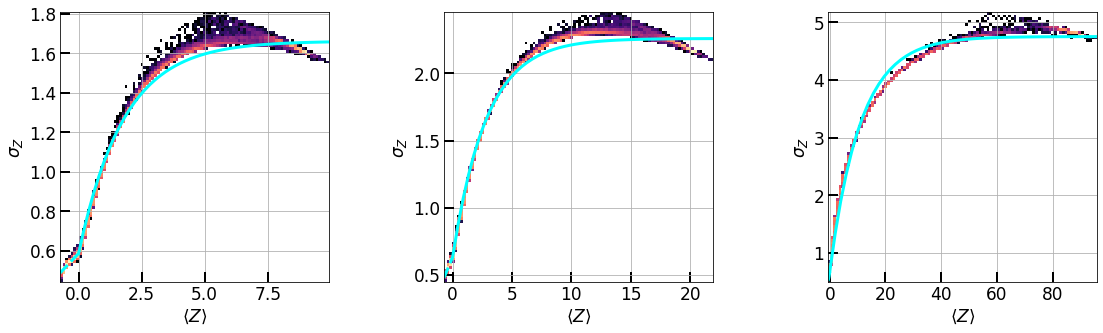

In [108]:
xsize = 16
ysize = 5

nfigs_x = 3
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.17
wpad = 0.1
w0 = 0.06
xs_panel = 0.70 / nfigs_x 
ys_panel = 0.75 / nfigs_y 

# Formatting tick labels in log scale.
def format_func(value, tick_number):
    return "10$^{%i}$"%value

labelsize = 17
labelfont = 17

############################################################################################################
############################               5 Angstroms             #######################################
############################################################################################################

ii = 0
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, hpad + jj*ys_panel, xs_panel, ys_panel])


ax.hist2d(cdist_50AA["zmean"], cdist_50AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

zmean_arr_pos = np.linspace(0, np.max(cdist_50AA["zmean"]))
NewPar        = function_sigma_pos(zmean_arr_pos,1.0758, 1.7832, 0.5860)
ax.plot(zmean_arr_pos, NewPar, "-", color="cyan", linewidth=3)

zmean_arr_neg = np.linspace(np.min(cdist_50AA["zmean"]), 0)
NewPar_neg        = function_sigma_neg(zmean_arr_neg, -1.0379e3, 0.5860, 7.7069e3)
ax.plot(zmean_arr_neg, NewPar_neg, "--", color="cyan", linewidth=3)
#NewPar_neg        = function_sigma_neg(zmean_arr_neg, 0.8204, 0.2310)
#ax.plot(zmean_arr_neg, NewPar_neg, "--r", linewidth=3)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\sigma_{Z}$", fontsize=labelsize)
ax.set_xlabel("$\\langle Z \\rangle$", fontsize=labelsize)


ax.grid("on")


############################################################################################################
############################               100 Angstroms             #######################################


ii = 1
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(cdist_100AA["zmean"], cdist_100AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

zmean_arr_pos = np.linspace(0, np.max(cdist_100AA["zmean"]))
NewPar        = function_sigma_pos(zmean_arr_pos, 1.6245, 2.8390, 0.6346)
ax.plot(zmean_arr_pos, NewPar, "-", color="cyan", linewidth=3)

zmean_arr_neg = np.linspace(np.min(cdist_100AA["zmean"]), 0)
NewPar_neg        = function_sigma_neg(zmean_arr_neg, -4.2075e2,0.6346, 1.9840e3)
ax.plot(zmean_arr_neg, NewPar_neg, "--", color="cyan", linewidth=3)
#NewPar_neg        = function_sigma_neg(zmean_arr_neg, -8.3231, 4.1302)
#ax.plot(zmean_arr_neg, NewPar_neg, "--r", linewidth=3)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\sigma_{Z}$", fontsize=labelsize)
ax.set_xlabel("$\\langle Z \\rangle$", fontsize=labelsize)

ax.grid("on")




############################################################################################################
############################            1000 Angstroms             #######################################


ii = 2
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(cdist_500AA["zmean"], cdist_500AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

zmean_arr_pos = np.linspace(0, np.max(cdist_500AA["zmean"]))
NewPar        = function_sigma_pos(zmean_arr_pos, 4.0732, 11.0200, 0.6797)
ax.plot(zmean_arr_pos, NewPar, "-", color="cyan", linewidth=3)

zmean_arr_neg = np.linspace(np.min(cdist_500AA["zmean"]), 0)
NewPar_neg        = function_sigma_neg(zmean_arr_neg, -0.2418,0.6797, 0.5910)
ax.plot(zmean_arr_neg, NewPar_neg, "--", color="cyan", linewidth=3)
#NewPar_neg        = function_sigma_neg(zmean_arr_neg, -81.3063, 39.7163)
#ax.plot(zmean_arr_neg, NewPar_neg, "--r", linewidth=3)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\sigma_{Z}$", fontsize=labelsize)
ax.set_xlabel("$\\langle Z \\rangle$", fontsize=labelsize)

ax.grid("on")

fig.show()

#fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Apendix/Figure7_%s_50-100-5000_width.pdf"%(grain_type), format="pdf")
fig.savefig("/Users/juan/Dropbox/Projects/Papers/Submitted/GrainCharge/Figures/Apendix/Figure7_%s_50-100-500_width.pdf"%(grain_type), format="pdf")

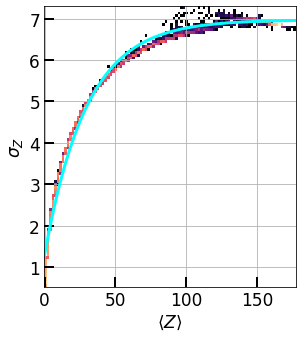

In [109]:
xsize = 5
ysize = 5

nfigs_x = 1
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.17
wpad = 0.15

xs_panel = 0.70 / nfigs_x 
ys_panel = 0.78 / nfigs_y 


ii = 0
jj = 0

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(cdist_1000AA["zmean"], cdist_1000AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

zmean_arr_pos = np.linspace(0, np.max(cdist_1000AA["zmean"]))
NewPar        = function_sigma_pos(zmean_arr_pos, 5.6887, 29.7561, 1.2821)
ax.plot(zmean_arr_pos, NewPar, "-", color="cyan", linewidth=3)

zmean_arr_neg = np.linspace(np.min(cdist_1000AA["zmean"]), 0)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\sigma_{Z}$", fontsize=labelsize)
ax.set_xlabel("$\\langle Z \\rangle$", fontsize=labelsize)

ax.grid("on")

fig.show()

#fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Apendix/Figure7_%s_1000_width.pdf"%(grain_type), format="pdf")
fig.savefig("/Users/juan/Dropbox/Projects/Papers/Submitted/GrainCharge/Figures/Apendix/Figure7_%s_1000_width.pdf"%(grain_type), format="pdf")

---

## Now for the Carbonaceous grains

In [73]:
#grain_type = "silicate"
grain_type = "carbonaceous"
pcent      = 1

include_500_1000 = True

#save_dir = "/home/jcibanezm/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"
save_dir = "/Users/juan/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"

########################################################################################

grain_size = 3

filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist_3AA = pickle.load(pkl_file)
pkl_file.close

########################################################################################

grain_size = 5

filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist_5AA = pickle.load(pkl_file)
pkl_file.close

########################################################################################

grain_size = 10

filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist_10AA = pickle.load(pkl_file)
pkl_file.close

########################################################################################

grain_size = 50

filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist_50AA = pickle.load(pkl_file)
pkl_file.close

########################################################################################

grain_size = 100

filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist_100AA = pickle.load(pkl_file)
pkl_file.close

########################################################################################

if include_500_1000 == True:
    print("Loading the charge distribution for 500 and 1000 Angstrom grains")
    grain_size = 500
    pcent      = 0.1

    filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

    pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
    cdist_500AA = pickle.load(pkl_file)
    pkl_file.close

    ########################################################################################

    grain_size = 1000

    filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 

    pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
    cdist_1000AA = pickle.load(pkl_file)
    pkl_file.close


too_high = np.where(cdist_3AA["nH"] > 2.0e4)
if include_500_1000 == True:
    too_high_500 = np.where(cdist_500AA["nH"] > 2.0e4)
    too_high_1000 = np.where(cdist_1000AA["nH"] > 2.0e4)
    
ii = 0
for key in cdist_3AA.keys():
    #arrs.append(0)
    if key!="Qabs_mean" and key!="grain_size" and key!="grain_type" and key!="MPI" and key!="fdist" and key!="info" and key!="zminmax" and key!="ZZ":
        #print(key)
        cdist_3AA[key]    = np.delete(cdist_3AA[key],    too_high)
        cdist_5AA[key]    = np.delete(cdist_5AA[key],    too_high)
        cdist_10AA[key]   = np.delete(cdist_10AA[key],   too_high)
        cdist_50AA[key]   = np.delete(cdist_50AA[key],   too_high)
        cdist_100AA[key]  = np.delete(cdist_100AA[key],  too_high)
        if include_500_1000 == True:
            cdist_500AA[key]  = np.delete(cdist_500AA[key],  too_high_500)
            cdist_1000AA[key] = np.delete(cdist_1000AA[key], too_high_1000)
    #ii +=1
    

        
GTn_3AA    = (cdist_3AA["G"]   + cdist_3AA["G_CR"]) * np.sqrt(cdist_3AA["temp"])   / cdist_3AA["new_ne"] 
GTn_5AA    = (cdist_5AA["G"]   + cdist_5AA["G_CR"]) * np.sqrt(cdist_5AA["temp"])   / cdist_5AA["new_ne"] 
GTn_10AA   = (cdist_10AA["G"]  + cdist_10AA["G_CR"]) * np.sqrt(cdist_10AA["temp"])  / cdist_10AA["new_ne"] 
GTn_50AA   = (cdist_50AA["G"]  + cdist_50AA["G_CR"]) * np.sqrt(cdist_50AA["temp"])  / cdist_50AA["new_ne"] 
GTn_100AA  = (cdist_100AA["G"] + cdist_100AA["G_CR"]) * np.sqrt(cdist_100AA["temp"]) / cdist_100AA["new_ne"] 

if include_500_1000 == True:
    GTn_500AA  = (cdist_500AA["G"] + cdist_500AA["G_CR"]) * np.sqrt(cdist_500AA["temp"])  / cdist_500AA["new_ne"] 
    GTn_1000AA = (cdist_1000AA["G"]+ cdist_1000AA["G_CR"]) * np.sqrt(cdist_1000AA["temp"]) / cdist_1000AA["new_ne"]

Loading the charge distribution for 500 and 1000 Angstrom grains


---

In [74]:
Uavg3 = (cdist_3AA["zmean"]*echargeSI/(3.5*AAtom)*8.99e9)
Uavg5 = (cdist_5AA["zmean"]*echargeSI/(5.0*AAtom)*8.99e9)
Uavg10 = (cdist_10AA["zmean"]*echargeSI/(10.0*AAtom)*8.99e9)
Uavg50 = (cdist_50AA["zmean"]*echargeSI/(50.0*AAtom)*8.99e9)
Uavg100 = (cdist_100AA["zmean"]*echargeSI/(100.0*AAtom)*8.99e9)
Uavg500 = (cdist_500AA["zmean"]*echargeSI/(500.0*AAtom)*8.99e9)
Uavg1000 = (cdist_1000AA["zmean"]*echargeSI/(1000.0*AAtom)*8.99e9)

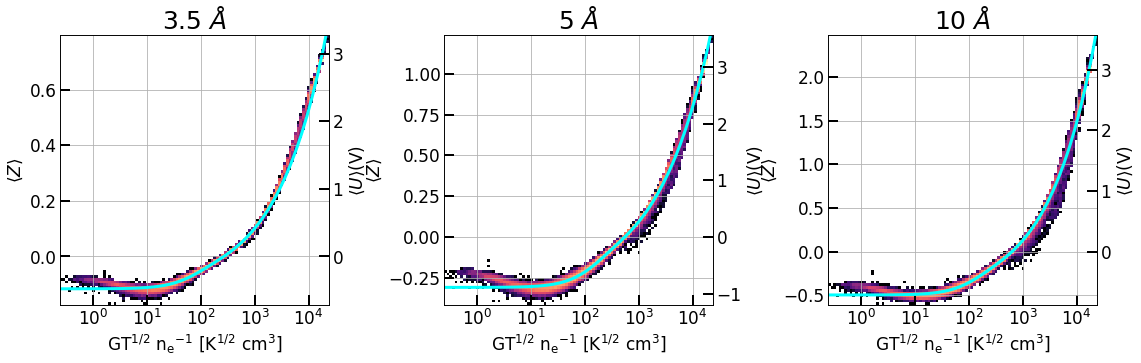

In [82]:
xsize = 16
ysize = 5

nfigs_x = 3
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.07
wpad = 0.1
w0 = 0.05

xs_panel = 0.70 / nfigs_x 
ys_panel = 0.75 / nfigs_y 

# Formatting tick labels in log scale.
def format_func(value, tick_number):
    return "10$^{%i}$"%value

labelsize = 17
labelfont = 17

############################################################################################################
############################               5 Angstroms             #######################################
############################################################################################################


ii = 0
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, 2.3*hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(GTn_3AA), cdist_3AA["zmean"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

GTn_arr = np.logspace(np.log10(np.min(GTn_3AA)), np.log10(np.max(GTn_3AA)))
NewPar  = function(GTn_arr, 0.4699, 0.0085, -0.1162, 48.)


#ax.plot((GTn_arr), NewPar, "-r", linewidth=3)
ax.plot(np.log10(GTn_arr), NewPar, "-", color="cyan", linewidth=3)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_xlabel("GT$^{1/2}$ n$_{\\mathrm{e}}$$^{-1}$ [K$^{1/2}$ cm$^{3}$]", fontsize=labelfont)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=labelfont)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax.grid("on")

ax1 = ax.twinx()
ax1.set_ylabel("$\\langle U \\rangle$(V)", fontsize=labelfont)
ax1.set_ylim(np.min(Uavg3), np.max(Uavg3))

ax1.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax1.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

ax.set_title("3.5 $\\AA$", fontsize=25)


############################################################################################################
############################               100 Angstroms             #######################################

ii = 1
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, 2.3*hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(GTn_5AA), cdist_5AA["zmean"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

GTn_arr = np.logspace(np.log10(np.min(GTn_5AA)), np.log10(np.max(GTn_5AA)))
NewPar  = function(GTn_arr, 0.4386, 0.0195, -0.3084, 95.)


ax.plot(np.log10(GTn_arr), NewPar, "-", color="cyan", linewidth=3)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_xlabel("GT$^{1/2}$ n$_{\\mathrm{e}}$$^{-1}$ [K$^{1/2}$ cm$^{3}$]", fontsize=labelfont)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=labelfont)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax.grid("on")

ax1 = ax.twinx()
ax1.set_ylabel("$\\langle U \\rangle$(V)", fontsize=labelfont)
ax1.set_ylim(np.min(Uavg5), np.max(Uavg5))

ax1.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax1.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

ax.set_title("5 $\\AA$", fontsize=25)

############################################################################################################
############################            1000 Angstroms             #######################################


ii = 2
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, 2.3*hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(GTn_10AA), cdist_10AA["zmean"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

GTn_arr = np.logspace(np.log10(np.min(GTn_10AA)), np.log10(np.max(GTn_10AA)))
NewPar  = function(GTn_arr, 0.4994, 0.0199, -0.4959, 78.)

ax.plot(np.log10(GTn_arr), NewPar, "-", color="cyan", linewidth=3)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_xlabel("GT$^{1/2}$ n$_{\\mathrm{e}}$$^{-1}$ [K$^{1/2}$ cm$^{3}$]", fontsize=labelfont)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=labelfont)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax.grid("on")

ax1 = ax.twinx()
ax1.set_ylabel("$\\langle U \\rangle$(V)", fontsize=labelfont)
ax1.set_ylim(np.min(Uavg10), np.max(Uavg10))

ax1.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax1.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")
ax.set_title("10 $\\AA$", fontsize=25)

fig.show()

#fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Apendix/Figure7_%s-3-5-10AA_centroid.pdf"%(grain_type), format="pdf")
fig.savefig("/Users/juan/Dropbox/Projects/Papers/Submitted/GrainCharge/Figures/Apendix/Figure7_%s-3-5-10AA_centroid.pdf"%(grain_type), format="pdf")

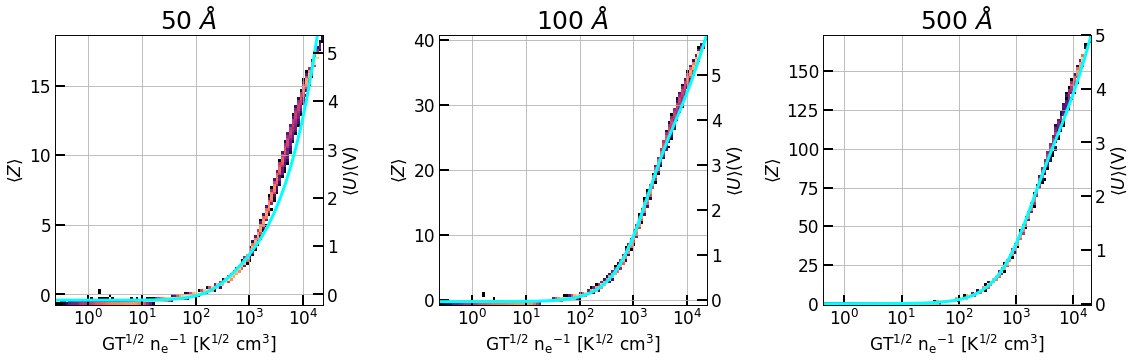

In [83]:
xsize = 16
ysize = 5

nfigs_x = 3
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.07
wpad = 0.1
w0 = 0.05

xs_panel = 0.70 / nfigs_x 
ys_panel = 0.75 / nfigs_y 

# Formatting tick labels in log scale.
def format_func(value, tick_number):
    return "10$^{%i}$"%value

labelsize = 17
labelfont = 17

############################################################################################################
############################               5 Angstroms             #######################################
############################################################################################################


ii = 0
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, 2.3*hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(GTn_50AA), cdist_50AA["zmean"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

GTn_arr = np.logspace(np.log10(np.min(GTn_50AA)), np.log10(np.max(GTn_50AA)))
NewPar  = function(GTn_arr, 0.6009, 0.0523, -0.4092, 218.)

#ax.plot((GTn_arr), NewPar, "-r", linewidth=3)
ax.plot(np.log10(GTn_arr), NewPar,  "-", color="cyan", linewidth=3)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_xlabel("GT$^{1/2}$ n$_{\\mathrm{e}}$$^{-1}$ [K$^{1/2}$ cm$^{3}$]", fontsize=labelfont)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=labelfont)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax.grid("on")

ax1 = ax.twinx()
ax1.set_ylabel("$\\langle U \\rangle$(V)", fontsize=labelfont)
ax1.set_ylim(np.min(Uavg50), np.max(Uavg50))

ax1.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax1.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

ax.set_title("50 $\\AA$", fontsize=25)


############################################################################################################
############################               100 Angstroms             #######################################

ii = 1
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, 2.3*hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(GTn_100AA), cdist_100AA["zmean"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

GTn_arr = np.logspace(np.log10(np.min(GTn_100AA)), np.log10(np.max(GTn_100AA)))
NewPar  = function(GTn_arr, 0.2900, 2.2310, -0.2061, 1063.)

ax.plot(np.log10(GTn_arr), NewPar,  "-", color="cyan", linewidth=3)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_xlabel("GT$^{1/2}$ n$_{\\mathrm{e}}$$^{-1}$ [K$^{1/2}$ cm$^{3}$]", fontsize=labelfont)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=labelfont)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax.grid("on")

ax1 = ax.twinx()
ax1.set_ylabel("$\\langle U \\rangle$(V)", fontsize=labelfont)
ax1.set_ylim(np.min(Uavg100), np.max(Uavg100))

ax1.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax1.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")


ax.set_title("100 $\\AA$", fontsize=25)

############################################################################################################
############################            1000 Angstroms             #######################################


ii = 2
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, 2.3*hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(GTn_500AA), cdist_500AA["zmean"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

GTn_arr = np.logspace(np.log10(np.min(GTn_500AA)), np.log10(np.max(GTn_500AA)))
NewPar  = function(GTn_arr, 0.3400, 5.8944, 0.1727, 1034.)


ax.plot(np.log10(GTn_arr), NewPar,  "-", color="cyan", linewidth=3)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_xlabel("GT$^{1/2}$ n$_{\\mathrm{e}}$$^{-1}$ [K$^{1/2}$ cm$^{3}$]", fontsize=labelfont)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=labelfont)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax.grid("on")

ax1 = ax.twinx()
ax1.set_ylabel("$\\langle U \\rangle$(V)", fontsize=labelfont)
ax1.set_ylim(np.min(Uavg500), np.max(Uavg500))

ax1.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax1.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")


ax.set_title("500 $\\AA$", fontsize=25)

fig.show()

#fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Apendix/Figure7_%s-50-100-500AA_centroid.pdf"%(grain_type), format="pdf")
fig.savefig("/Users/juan/Dropbox/Projects/Papers/Submitted/GrainCharge/Figures/Apendix/Figure7_%s-50-100-500AA_centroid.pdf"%(grain_type), format="pdf")

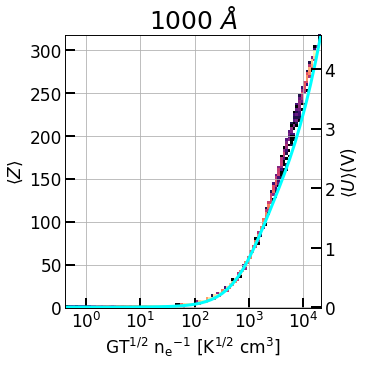

In [88]:
xsize = 5
ysize = 5

nfigs_x = 1
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.065
wpad = 0.26

xs_panel = 0.71 / nfigs_x 
ys_panel = 0.76 / nfigs_y 

# Formatting tick labels in log scale.
def format_func(value, tick_number):
    return "10$^{%i}$"%value


ii = 0
jj = 0

ax = fig.add_axes([wpad*0.65 + ii*xs_panel+ii*wpad, 2.3*hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(GTn_1000AA), cdist_1000AA["zmean"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

GTn_arr = np.logspace(np.log10(np.min(GTn_1000AA)), np.log10(np.max(GTn_1000AA)))
NewPar  = function(GTn_arr, 0.4601, 3.2625, 0.4184, 764.)

#Zparam_500AA  = function(GTn_500AA, )

#ax.plot((GTn_arr), NewPar, "-r", linewidth=3)
ax.plot(np.log10(GTn_arr), NewPar, "-", color="cyan", linewidth=3)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_xlabel("GT$^{1/2}$ n$_{\\mathrm{e}}$$^{-1}$ [K$^{1/2}$ cm$^{3}$]", fontsize=labelfont)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=labelfont)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax.grid("on")

ax1 = ax.twinx()
ax1.set_ylabel("$\\langle U \\rangle$(V)", fontsize=labelfont)
ax1.set_ylim(np.min(Uavg1000), np.max(Uavg1000))

ax1.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax1.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")


ax.set_title("1000 $\\AA$", fontsize=25)

fig.show()

#fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Apendix/Figure7_%s-1000A_centroid.pdf"%(grain_type), format="pdf")
fig.savefig("/Users/juan/Dropbox/Projects/Papers/Submitted/GrainCharge/Figures/Apendix/Figure7_%s-1000AA_centroid.pdf"%(grain_type), format="pdf")

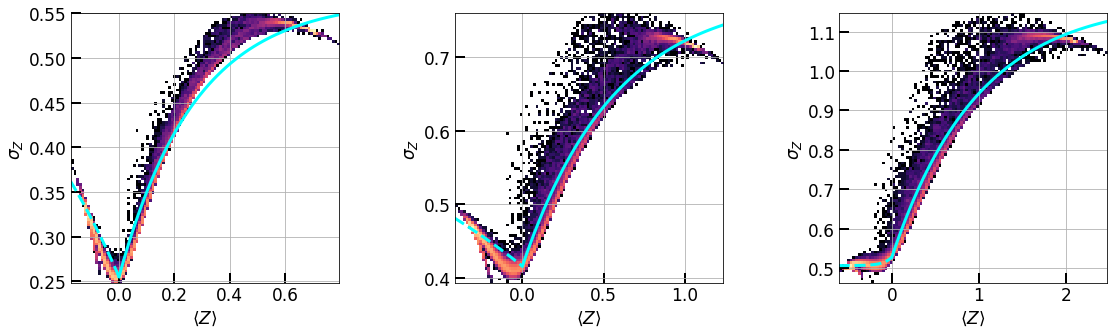

In [90]:
xsize = 16
ysize = 5

nfigs_x = 3
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.17
wpad = 0.1
w0 = 0.06
xs_panel = 0.70 / nfigs_x 
ys_panel = 0.75 / nfigs_y 

# Formatting tick labels in log scale.
def format_func(value, tick_number):
    return "10$^{%i}$"%value

labelsize = 17
labelfont = 17

############################################################################################################
############################               5 Angstroms             #######################################
############################################################################################################

ii = 0
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, hpad + jj*ys_panel, xs_panel, ys_panel])


ax.hist2d(cdist_3AA["zmean"], cdist_3AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

zmean_arr_pos = np.linspace(0, np.max(cdist_3AA["zmean"]))
NewPar        = function_sigma_pos(zmean_arr_pos, 0.3103, 0.2744, 0.2551)
ax.plot(zmean_arr_pos, NewPar, "-", color="cyan", linewidth=3)

zmean_arr_neg = np.linspace(np.min(cdist_3AA["zmean"]), 0)
NewPar_neg        = function_sigma_neg(zmean_arr_neg, 0.3766,0.2551, 0.5241)
ax.plot(zmean_arr_neg, NewPar_neg, "--", color="cyan", linewidth=3)
#NewPar_neg        = function_sigma_neg(zmean_arr_neg, 0.8204, 0.2310)
#ax.plot(zmean_arr_neg, NewPar_neg, "--r", linewidth=3)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\sigma_{Z}$", fontsize=labelsize)
ax.set_xlabel("$\\langle Z \\rangle$", fontsize=labelsize)

#ax.set_ylim(0.3, 0.60)

ax.grid("on")


############################################################################################################
############################               100 Angstroms             #######################################


ii = 1
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(cdist_5AA["zmean"], cdist_5AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

zmean_arr_pos = np.linspace(0, np.max(cdist_5AA["zmean"]))
NewPar        = function_sigma_pos(zmean_arr_pos, 0.3699, 0.5654, 0.4158)
ax.plot(zmean_arr_pos, NewPar, "-", color="cyan", linewidth=3)

zmean_arr_neg = np.linspace(np.min(cdist_5AA["zmean"]), 0)
NewPar_neg        = function_sigma_neg(zmean_arr_neg,0.2890,0.4158, 1.6241)
ax.plot(zmean_arr_neg, NewPar_neg, "--", color="cyan", linewidth=3)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\sigma_{Z}$", fontsize=labelsize)
ax.set_xlabel("$\\langle Z \\rangle$", fontsize=labelsize)

ax.grid("on")




############################################################################################################
############################            1000 Angstroms             #######################################


ii = 2
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(cdist_10AA["zmean"], cdist_10AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

zmean_arr_pos = np.linspace(0, np.max(cdist_10AA["zmean"]))
NewPar        = function_sigma_pos(zmean_arr_pos, 0.6511, 0.9839, 0.5275)
ax.plot(zmean_arr_pos, NewPar, "-", color="cyan", linewidth=3)

zmean_arr_neg = np.linspace(np.min(cdist_10AA["zmean"]), 0)
NewPar_neg        = function_sigma_neg(zmean_arr_neg, -0.0213,0.5275, 0.0977)
ax.plot(zmean_arr_neg, NewPar_neg, "--", color="cyan", linewidth=3)
#NewPar_neg        = function_sigma_neg(zmean_arr_neg, -81.3063, 39.7163)
#ax.plot(zmean_arr_neg, NewPar_neg, "--r", linewidth=3)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\sigma_{Z}$", fontsize=labelsize)
ax.set_xlabel("$\\langle Z \\rangle$", fontsize=labelsize)

ax.grid("on")

fig.show()

#fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Apendix/Figure7_%s_3-5-10_width.pdf"%(grain_type), format="pdf")
fig.savefig("/Users/juan/Dropbox/Projects/Papers/Submitted/GrainCharge/Figures/Apendix/Figure7_%s_3-5-10_width.pdf"%(grain_type), format="pdf")

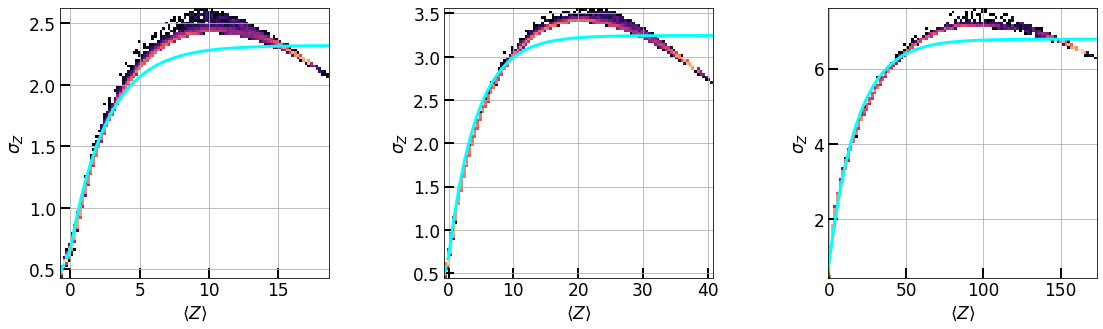

In [91]:
xsize = 16
ysize = 5

nfigs_x = 3
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.17
wpad = 0.1
w0 = 0.06
xs_panel = 0.70 / nfigs_x 
ys_panel = 0.75 / nfigs_y 

# Formatting tick labels in log scale.
def format_func(value, tick_number):
    return "10$^{%i}$"%value

labelsize = 17
labelfont = 17

############################################################################################################
############################               5 Angstroms             #######################################
############################################################################################################

ii = 0
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, hpad + jj*ys_panel, xs_panel, ys_panel])


ax.hist2d(cdist_50AA["zmean"], cdist_50AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

zmean_arr_pos = np.linspace(0, np.max(cdist_50AA["zmean"]))
NewPar        = function_sigma_pos(zmean_arr_pos,1.6536, 2.6688, 0.6671 )
ax.plot(zmean_arr_pos, NewPar, "-", color="cyan", linewidth=3)

zmean_arr_neg = np.linspace(np.min(cdist_50AA["zmean"]), 0)
NewPar_neg        = function_sigma_neg(zmean_arr_neg, -9.5138,0.6671, 35.3519)
ax.plot(zmean_arr_neg, NewPar_neg, "--", color="cyan", linewidth=3)
#NewPar_neg        = function_sigma_neg(zmean_arr_neg, 0.8204, 0.2310)
#ax.plot(zmean_arr_neg, NewPar_neg, "--r", linewidth=3)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\sigma_{Z}$", fontsize=labelsize)
ax.set_xlabel("$\\langle Z \\rangle$", fontsize=labelsize)


ax.grid("on")


############################################################################################################
############################               100 Angstroms             #######################################


ii = 1
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(cdist_100AA["zmean"], cdist_100AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

zmean_arr_pos = np.linspace(0, np.max(cdist_100AA["zmean"]))
NewPar        = function_sigma_pos(zmean_arr_pos, 2.5445, 4.3352, 0.7010)
ax.plot(zmean_arr_pos, NewPar, "-", color="cyan", linewidth=3)

zmean_arr_neg = np.linspace(np.min(cdist_100AA["zmean"]), 0)
NewPar_neg        = function_sigma_neg(zmean_arr_neg, -2.5341e3,0.7010, 8.1962e3)
ax.plot(zmean_arr_neg, NewPar_neg, "--", color="cyan", linewidth=3)
#NewPar_neg        = function_sigma_neg(zmean_arr_neg, -8.3231, 4.1302)
#ax.plot(zmean_arr_neg, NewPar_neg, "--r", linewidth=3)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\sigma_{Z}$", fontsize=labelsize)
ax.set_xlabel("$\\langle Z \\rangle$", fontsize=labelsize)

ax.grid("on")




############################################################################################################
############################            1000 Angstroms             #######################################


ii = 2
jj = 0

ax = fig.add_axes([w0 + ii*xs_panel+ii*wpad, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(cdist_500AA["zmean"], cdist_500AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

zmean_arr_pos = np.linspace(0, np.max(cdist_500AA["zmean"]))
NewPar        = function_sigma_pos(zmean_arr_pos,5.9455, 18.3186,  0.8377)
ax.plot(zmean_arr_pos, NewPar, "-", color="cyan", linewidth=3)

zmean_arr_neg = np.linspace(np.min(cdist_500AA["zmean"]), 0)
NewPar_neg        = function_sigma_neg(zmean_arr_neg, -2.4189e3, 0.8377, 4.9424e3)
ax.plot(zmean_arr_neg, NewPar_neg, "--", color="cyan", linewidth=3)
#NewPar_neg        = function_sigma_neg(zmean_arr_neg, -81.3063, 39.7163)
#ax.plot(zmean_arr_neg, NewPar_neg, "--r", linewidth=3)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\sigma_{Z}$", fontsize=labelsize)
ax.set_xlabel("$\\langle Z \\rangle$", fontsize=labelsize)

ax.grid("on")

fig.show()

#fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Apendix/Figure7_%s_50-100-5000_width.pdf"%(grain_type), format="pdf")
fig.savefig("/Users/juan/Dropbox/Projects/Papers/Submitted/GrainCharge/Figures/Apendix/Figure7_%s_50-100-5000_width.pdf"%(grain_type), format="pdf")

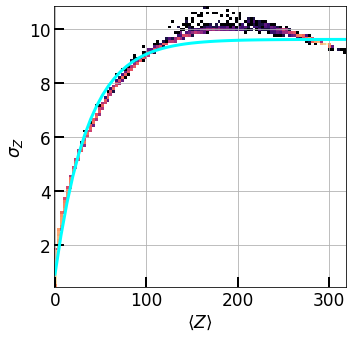

In [93]:
xsize = 5
ysize = 5

nfigs_x = 1
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.17
wpad = 0.15

xs_panel = 0.81 / nfigs_x 
ys_panel = 0.78 / nfigs_y 


ii = 0
jj = 0

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(cdist_1000AA["zmean"], cdist_1000AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")

zmean_arr_pos = np.linspace(0, np.max(cdist_1000AA["zmean"]))
NewPar        = function_sigma_pos(zmean_arr_pos, 8.7003, 36.1014, 0.9094)
ax.plot(zmean_arr_pos, NewPar, "-", color="cyan", linewidth=3)

zmean_arr_neg = np.linspace(np.min(cdist_1000AA["zmean"]), 0)


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=labelsize, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=labelsize, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\sigma_{Z}$", fontsize=labelsize)
ax.set_xlabel("$\\langle Z \\rangle$", fontsize=labelsize)

ax.grid("on")

fig.show()

#fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Apendix/Figure7_%s_1000_width.pdf"%(grain_type), format="pdf")
fig.savefig("/Users/juan/Dropbox/Projects/Papers/Submitted/GrainCharge/Figures/Apendix/Figure7_%s_1000_width.pdf"%(grain_type), format="pdf")

---

In [278]:
wnm = (cdist_3AA["temp"] > 300)
cnm = ((cdist_3AA["temp"] < 300) & (cdist_3AA["xH2"]<0.5))
cmm = ((cdist_3AA["temp"] < 30) & (cdist_3AA["xH2"]>=0.5))

wnm500 = (cdist_500AA["temp"] > 300)
cnm500 = ((cdist_500AA["temp"] < 300) & (cdist_500AA["xH2"]<0.5))
cmm500 = ((cdist_500AA["temp"] < 30) & (cdist_500AA["xH2"]>=0.5))

wnm1000 = (cdist_1000AA["temp"] > 300)
cnm1000 = ((cdist_1000AA["temp"] < 300) & (cdist_1000AA["xH2"]<0.5))
cmm1000 = ((cdist_1000AA["temp"] < 30) & (cdist_1000AA["xH2"]>=0.5))

In [279]:
wnmtrue = np.argwhere(wnm==True)
cnmtrue = np.argwhere(cnm==True)
cmmtrue = np.argwhere(cmm==True)

wnmtrue500 = np.argwhere(wnm500==True)
cnmtrue500 = np.argwhere(cnm500==True)
cmmtrue500 = np.argwhere(cmm500==True)

wnmtrue1000 = np.argwhere(wnm1000==True)
cnmtrue1000 = np.argwhere(cnm1000==True)
cmmtrue1000 = np.argwhere(cmm1000==True)

In [280]:
GTn_CMM = np.transpose(GTn_3AA[cmmtrue])[0]
GTn_CNM = np.transpose(GTn_3AA[cnmtrue])[0]
GTn_WNM = np.transpose(GTn_3AA[wnmtrue])[0]

GTn_CMM500 = np.transpose(GTn_500AA[cmmtrue500])[0]
GTn_CNM500 = np.transpose(GTn_500AA[cnmtrue500])[0]
GTn_WNM500 = np.transpose(GTn_500AA[wnmtrue500])[0]

GTn_CMM1000 = np.transpose(GTn_1000AA[cmmtrue1000])[0]
GTn_CNM1000 = np.transpose(GTn_1000AA[cnmtrue1000])[0]
GTn_WNM1000 = np.transpose(GTn_1000AA[wnmtrue1000])[0]

In [281]:
zcent_cmm_3 = np.transpose(cdist_3AA["zmean"][cmmtrue])[0]
zcent_cnm_3 = np.transpose(cdist_3AA["zmean"][cnmtrue])[0]
zcent_wnm_3 = np.transpose(cdist_3AA["zmean"][wnmtrue])[0]

zcent_cmm_5 = np.transpose(cdist_5AA["zmean"][cmmtrue])[0]
zcent_cnm_5 = np.transpose(cdist_5AA["zmean"][cnmtrue])[0]
zcent_wnm_5 = np.transpose(cdist_5AA["zmean"][wnmtrue])[0]

zcent_cmm_10 = np.transpose(cdist_10AA["zmean"][cmmtrue])[0]
zcent_cnm_10 = np.transpose(cdist_10AA["zmean"][cnmtrue])[0]
zcent_wnm_10 = np.transpose(cdist_10AA["zmean"][wnmtrue])[0]

zcent_cmm_50 = np.transpose(cdist_50AA["zmean"][cmmtrue])[0]
zcent_cnm_50 = np.transpose(cdist_50AA["zmean"][cnmtrue])[0]
zcent_wnm_50 = np.transpose(cdist_50AA["zmean"][wnmtrue])[0]

zcent_cmm_100 = np.transpose(cdist_100AA["zmean"][cmmtrue])[0]
zcent_cnm_100 = np.transpose(cdist_100AA["zmean"][cnmtrue])[0]
zcent_wnm_100 = np.transpose(cdist_100AA["zmean"][wnmtrue])[0]

zcent_cmm_500 = np.transpose(cdist_500AA["zmean"][cmmtrue500])[0]
zcent_cnm_500 = np.transpose(cdist_500AA["zmean"][cnmtrue500])[0]
zcent_wnm_500 = np.transpose(cdist_500AA["zmean"][wnmtrue500])[0]

zcent_cmm_1000 = np.transpose(cdist_1000AA["zmean"][cmmtrue1000])[0]
zcent_cnm_1000 = np.transpose(cdist_1000AA["zmean"][cnmtrue1000])[0]
zcent_wnm_1000 = np.transpose(cdist_1000AA["zmean"][wnmtrue1000])[0]

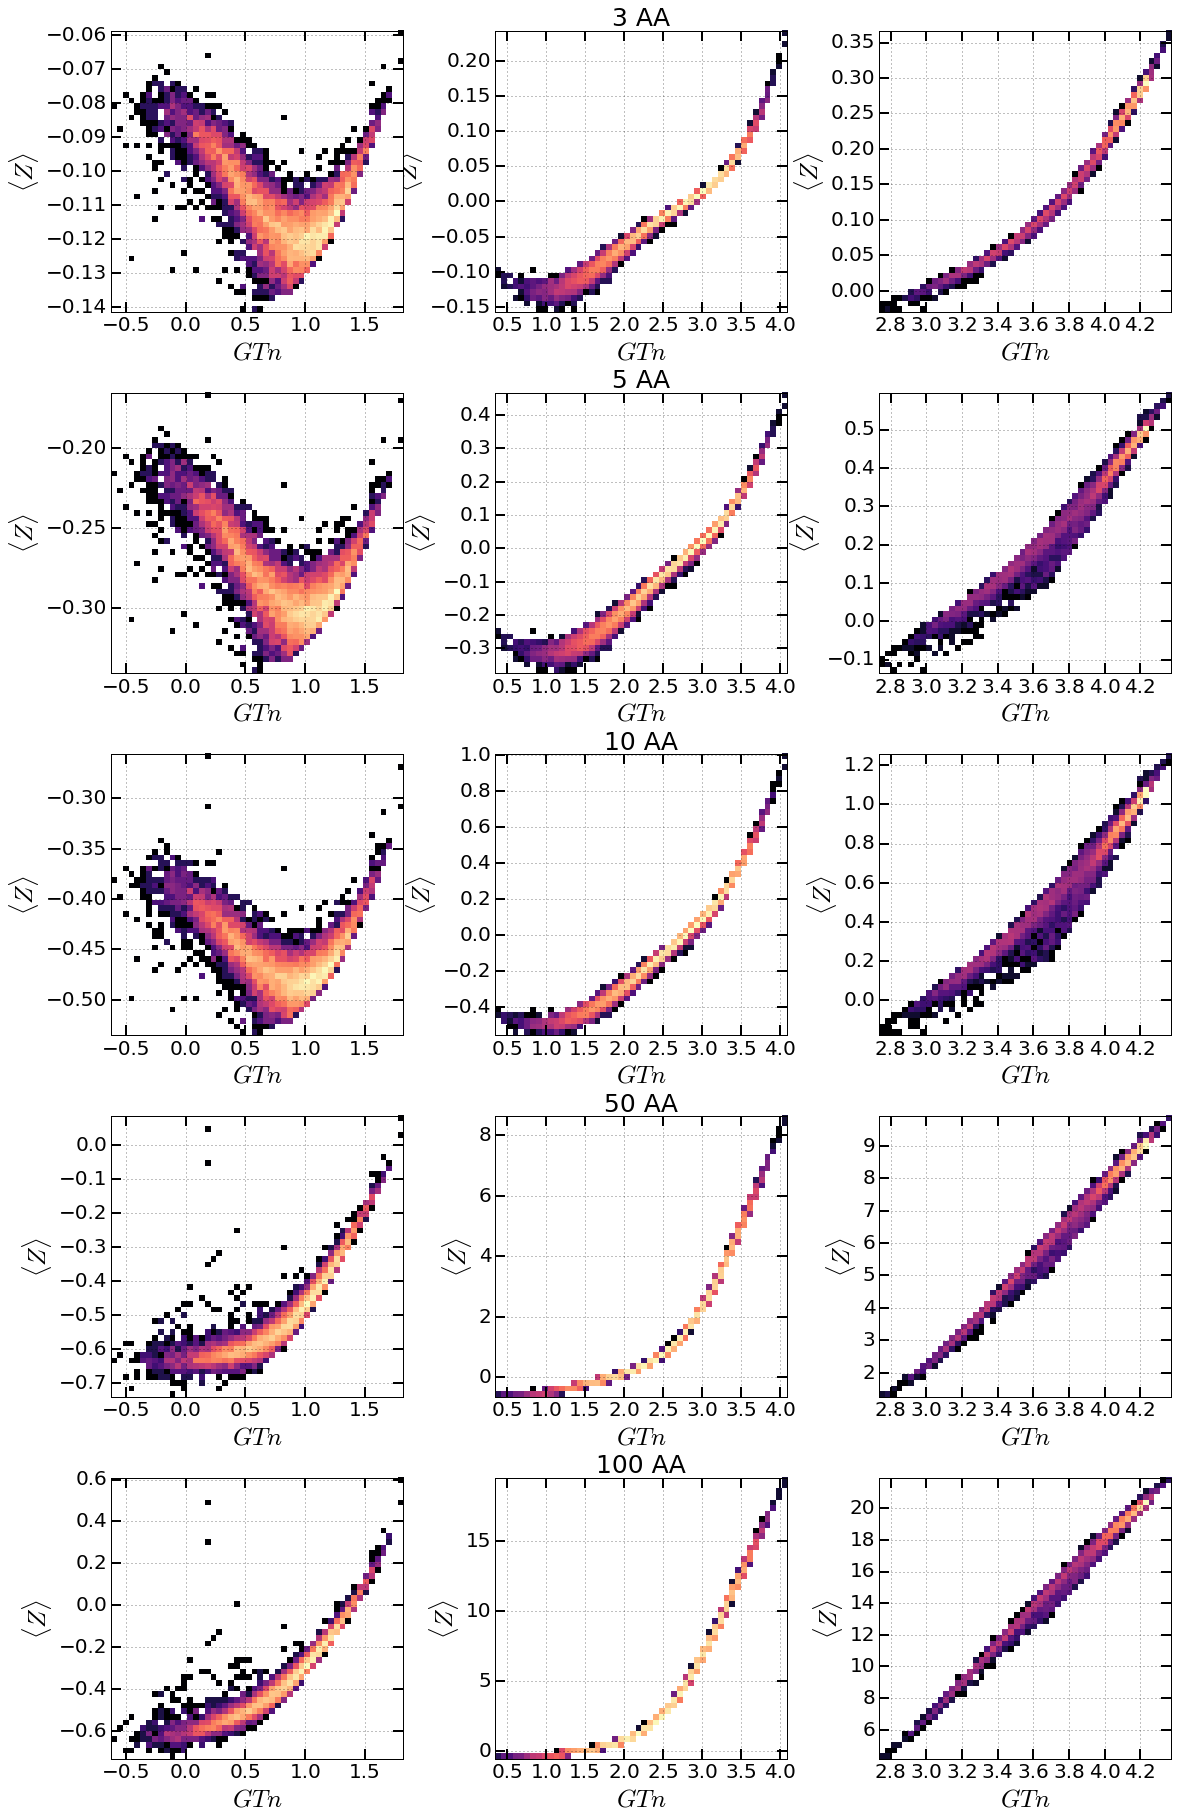

In [282]:
xsize = 16
ysize = 25

nfigs_x = 3
nfigs_y = 5

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.03
hhpad = 0.045
wpad = 0.08

xs_panel = 0.76 / nfigs_x 
ys_panel = 0.78 / nfigs_y 

#############################################33
ii = 2
jj = 0

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*(ys_panel+hhpad) , xs_panel, ys_panel])

#ax.hist2d(cdist_1000AA["zmean"], cdist_1000AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")
ax.hist2d(np.log10(GTn_WNM), zcent_wnm_100,  bins=50, norm=LogNorm(), cmap="magma")

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=25)
ax.set_xlabel("$GTn$", fontsize=25)

ax.grid("on")


ii = 1
jj = 0

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*(ys_panel+hhpad), xs_panel, ys_panel])

#ax.hist2d(cdist_1000AA["zmean"], cdist_1000AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")
ax.hist2d(np.log10(GTn_CNM), zcent_cnm_100,  bins=50, norm=LogNorm(), cmap="magma")

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=25)
ax.set_xlabel("$GTn$", fontsize=25)

ax.grid("on")

ax.set_title("100 AA", fontsize=25)

ii = 0
jj = 0

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*(ys_panel+hhpad), xs_panel, ys_panel])

#ax.hist2d(cdist_1000AA["zmean"], cdist_1000AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")
ax.hist2d(np.log10(GTn_CMM), zcent_cmm_100,  bins=50, norm=LogNorm(), cmap="magma")

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=25)
ax.set_xlabel("$GTn$", fontsize=25)

ax.grid("on")


############################################################################


#############################################33
ii = 2
jj = 1

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*(ys_panel+hhpad), xs_panel, ys_panel])

#ax.hist2d(cdist_1000AA["zmean"], cdist_1000AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")
ax.hist2d(np.log10(GTn_WNM), zcent_wnm_50,  bins=50, norm=LogNorm(), cmap="magma")

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=25)
ax.set_xlabel("$GTn$", fontsize=25)

ax.grid("on")


ii = 1
jj = 1

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*(ys_panel+hhpad), xs_panel, ys_panel])

#ax.hist2d(cdist_1000AA["zmean"], cdist_1000AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")
ax.hist2d(np.log10(GTn_CNM), zcent_cnm_50,  bins=50, norm=LogNorm(), cmap="magma")

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=25)
ax.set_xlabel("$GTn$", fontsize=25)

ax.grid("on")

ax.set_title("50 AA", fontsize=25)

ii = 0
jj = 1

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*(ys_panel+hhpad), xs_panel, ys_panel])

#ax.hist2d(cdist_1000AA["zmean"], cdist_1000AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")
ax.hist2d(np.log10(GTn_CMM), zcent_cmm_50,  bins=50, norm=LogNorm(), cmap="magma")

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=25)
ax.set_xlabel("$GTn$", fontsize=25)

ax.grid("on")


############################################################################
#############################################33
ii = 2
jj = 2

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*(ys_panel+hhpad), xs_panel, ys_panel])

#ax.hist2d(cdist_1000AA["zmean"], cdist_1000AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")
ax.hist2d(np.log10(GTn_WNM), zcent_wnm_10,  bins=50, norm=LogNorm(), cmap="magma")

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=25)
ax.set_xlabel("$GTn$", fontsize=25)

ax.grid("on")


ii = 1
jj = 2

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*(ys_panel+hhpad), xs_panel, ys_panel])

#ax.hist2d(cdist_1000AA["zmean"], cdist_1000AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")
ax.hist2d(np.log10(GTn_CNM), zcent_cnm_10,  bins=50, norm=LogNorm(), cmap="magma")

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=25)
ax.set_xlabel("$GTn$", fontsize=25)

ax.grid("on")

ax.set_title("10 AA", fontsize=25)

ii = 0
jj = 2

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*(ys_panel+hhpad), xs_panel, ys_panel])

#ax.hist2d(cdist_1000AA["zmean"], cdist_1000AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")
ax.hist2d(np.log10(GTn_CMM), zcent_cmm_10,  bins=50, norm=LogNorm(), cmap="magma")

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=25)
ax.set_xlabel("$GTn$", fontsize=25)

ax.grid("on")


############################################################################
#############################################33
ii = 2
jj = 3

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*(ys_panel+hhpad), xs_panel, ys_panel])

#ax.hist2d(cdist_1000AA["zmean"], cdist_1000AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")
ax.hist2d(np.log10(GTn_WNM), zcent_wnm_5,  bins=50, norm=LogNorm(), cmap="magma")

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=25)
ax.set_xlabel("$GTn$", fontsize=25)

ax.grid("on")


ii = 1
jj = 3

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*(ys_panel+hhpad), xs_panel, ys_panel])

#ax.hist2d(cdist_1000AA["zmean"], cdist_1000AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")
ax.hist2d(np.log10(GTn_CNM), zcent_cnm_5,  bins=50, norm=LogNorm(), cmap="magma")

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=25)
ax.set_xlabel("$GTn$", fontsize=25)

ax.grid("on")

ax.set_title("5 AA", fontsize=25)

ii = 0
jj = 3

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*(ys_panel+hhpad), xs_panel, ys_panel])

#ax.hist2d(cdist_1000AA["zmean"], cdist_1000AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")
ax.hist2d(np.log10(GTn_CMM), zcent_cmm_5,  bins=50, norm=LogNorm(), cmap="magma")

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=25)
ax.set_xlabel("$GTn$", fontsize=25)

ax.grid("on")


############################################################################
#############################################33
ii = 2
jj = 4

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*(ys_panel+hhpad), xs_panel, ys_panel])

#ax.hist2d(cdist_1000AA["zmean"], cdist_1000AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")
ax.hist2d(np.log10(GTn_WNM), zcent_wnm_3,  bins=50, norm=LogNorm(), cmap="magma")

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=25)
ax.set_xlabel("$GTn$", fontsize=25)

ax.grid("on")


ii = 1
jj = 4

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*(ys_panel+hhpad), xs_panel, ys_panel])

#ax.hist2d(cdist_1000AA["zmean"], cdist_1000AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")
ax.hist2d(np.log10(GTn_CNM), zcent_cnm_3,  bins=50, norm=LogNorm(), cmap="magma")

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=25)
ax.set_xlabel("$GTn$", fontsize=25)

ax.grid("on")

ax.set_title("3 AA", fontsize=25)

ii = 0
jj = 4

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*(ys_panel+hhpad), xs_panel, ys_panel])

#ax.hist2d(cdist_1000AA["zmean"], cdist_1000AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")
ax.hist2d(np.log10(GTn_CMM), zcent_cmm_3,  bins=50, norm=LogNorm(), cmap="magma")

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=25)
ax.set_xlabel("$GTn$", fontsize=25)

ax.grid("on")


############################################################################

fig.show()

fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Apendix/centroidsandwidths_byphase_%s.pdf"%grain_type, format="pdf")


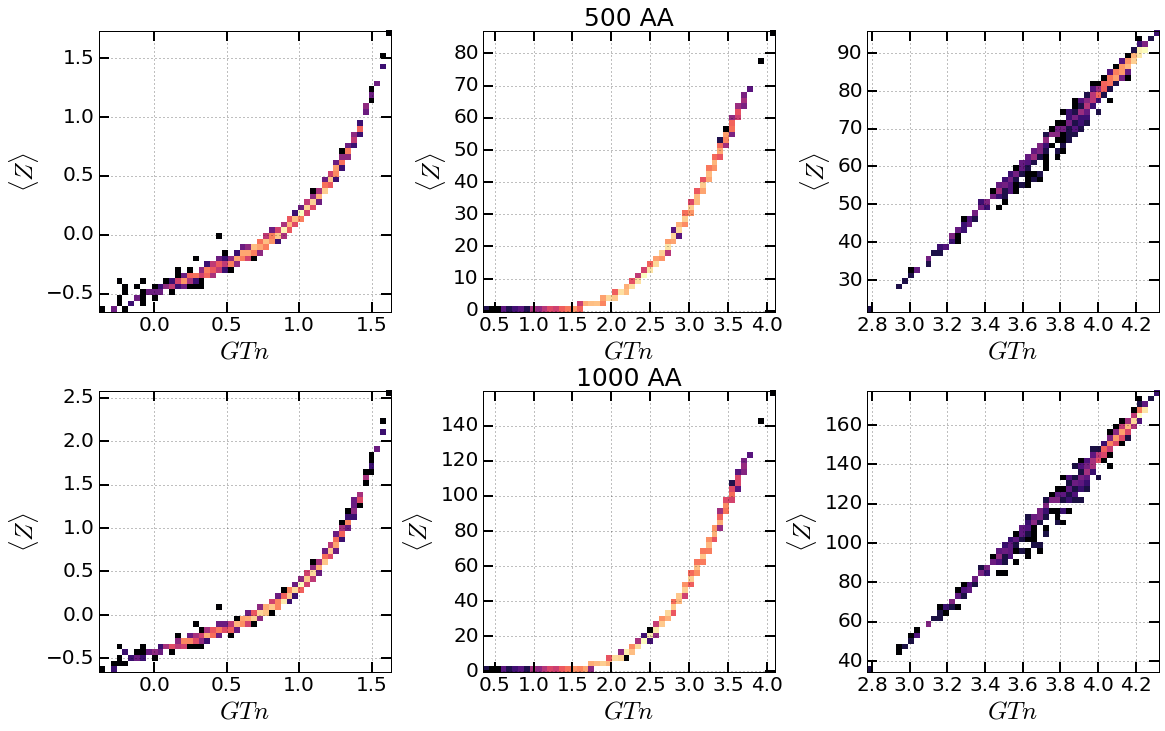

In [283]:
xsize = 16
ysize = 10

nfigs_x = 3
nfigs_y = 2

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.07
hhpad = 0.11
wpad = 0.08

xs_panel = 0.76 / nfigs_x 
ys_panel = 0.78 / nfigs_y 

#############################################33
ii = 2
jj = 0

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*(ys_panel+hhpad) , xs_panel, ys_panel])

#ax.hist2d(cdist_1000AA["zmean"], cdist_1000AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")
ax.hist2d(np.log10(GTn_WNM1000), zcent_wnm_1000,  bins=50, norm=LogNorm(), cmap="magma")

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=25)
ax.set_xlabel("$GTn$", fontsize=25)

ax.grid("on")


ii = 1
jj = 0

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*(ys_panel+hhpad), xs_panel, ys_panel])

#ax.hist2d(cdist_1000AA["zmean"], cdist_1000AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")
ax.hist2d(np.log10(GTn_CNM1000), zcent_cnm_1000,  bins=50, norm=LogNorm(), cmap="magma")

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=25)
ax.set_xlabel("$GTn$", fontsize=25)

ax.grid("on")

ax.set_title("1000 AA", fontsize=25)

ii = 0
jj = 0

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*(ys_panel+hhpad), xs_panel, ys_panel])

#ax.hist2d(cdist_1000AA["zmean"], cdist_1000AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")
ax.hist2d(np.log10(GTn_CMM1000), zcent_cmm_1000,  bins=50, norm=LogNorm(), cmap="magma")

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=25)
ax.set_xlabel("$GTn$", fontsize=25)

ax.grid("on")


############################################################################


#############################################33
ii = 2
jj = 1

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*(ys_panel+hhpad), xs_panel, ys_panel])

#ax.hist2d(cdist_1000AA["zmean"], cdist_1000AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")
ax.hist2d(np.log10(GTn_WNM500), zcent_wnm_500,  bins=50, norm=LogNorm(), cmap="magma")

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=25)
ax.set_xlabel("$GTn$", fontsize=25)

ax.grid("on")


ii = 1
jj = 1

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*(ys_panel+hhpad), xs_panel, ys_panel])

#ax.hist2d(cdist_1000AA["zmean"], cdist_1000AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")
ax.hist2d(np.log10(GTn_CNM500), zcent_cnm_500,  bins=50, norm=LogNorm(), cmap="magma")

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=25)
ax.set_xlabel("$GTn$", fontsize=25)

ax.grid("on")

ax.set_title("500 AA", fontsize=25)

ii = 0
jj = 1

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*(ys_panel+hhpad), xs_panel, ys_panel])

#ax.hist2d(cdist_1000AA["zmean"], cdist_1000AA["zstd"], bins=100, norm=LogNorm(), normed=True, cmap="magma")
ax.hist2d(np.log10(GTn_CMM500), zcent_cmm_500,  bins=50, norm=LogNorm(), cmap="magma")

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=25)
ax.set_xlabel("$GTn$", fontsize=25)

ax.grid("on")

fig.show()

fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Apendix/centroidsandwidths_500-1000_byphase_%s.pdf"%grain_type, format="pdf")
